# Numerical Simulation Laboratory

# Numerical exercise 5 

## Exercise 05.1
Campionare la densità di probabilità , corrispondente al modulo quadro dell'autofunzione, dell'orbitale dell'atomo di idrogeno utilizzando l'algoritmo di Metropolis; osservare la distribuzione delle distanze per calcolare il raggio medio di ground state ($n=1, l=0, m=0$) e stato eccitato $n=2, l=1, m=0$.

Le autofunzioni per l'atomo di idrogeno sono calcolabili analiticamente e per gli stati che ci interessano sono:

- Autostato $n=1$, $l=0$, $m=0$
    $$\Psi_{1,0,0}(r,\theta,\phi) = \frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}  \quad \quad \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
 $$

- Autostato $n=2$, $l=1$, $m=0$ 
    $$\Psi_{2,1,0}(r,\theta,\phi) = \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta) \quad \quad \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
$$

Per entrambi i casi effettuo il campionamento di entrambe le densità di probabilità utilizzando una probabilità di transizione uniforme e una normale multivariata. Per sfruttare al meglio l'algoritmo sfrutto la regola empirica del $\sim 50\%$ di *acceptance rate*, per cui prima delle simulazioni svolgo una fase di equilibrazione per determinare i parametri migliori per definire il salto della transizione: nel caso di transizione uniforme ho cercato l'intervallo ideale, per la normale multivariata oho cercato media e varianza ideali. Con pochi passaggi riesco facilmente a ottenere un rate di cerca $50\%$.

**Tutti i risultati sono mostrati in unità del raggio di Bohr**

### <font color='blue'> Probabilità di transizione uniforme </font>
In coordinate cartesiane, la transizione a probabilità uniforme viene effettuata nel seguente modo:

- $x_{n+1} = x_{n} + U(-\Delta, \Delta)$
- $y_{n+1} = y_{n} + U(-\Delta, \Delta)$
- $z_{n+1} = z_{n} + U(-\Delta, \Delta)$

$U(-\Delta, \Delta)$ indica un numero casuale uniformemente distribuito nell'intervallo $[-\Delta, \Delta]$, che andrà a variare il valore della coordinata. Tramite il processo di calibrazione trovo $\Delta \simeq 6/5$ come parametro ideale per l'autostato $\Psi_{100}$, mentre per l'autostato $\Psi_{210}$ trovo $\Delta \simeq 3$; i risultati di seguito per lo stato eccitato sono stati trovati utilizzando $\Delta \simeq 6/5$ e quindi avendo un *acceptance rate* un po' diverso da $1/2$ per mostrare se e come questa differenza può inlfuenzare la misura.

Ho utilizzato la probabilità di accettazione standard dell'algoritmo di Metropolis:
$$A=min[1,q(x|y)]$$

semplificata dal fatto che abbiamo $T(x|y)$ simmetrica dentro $q(x|y)$.

In fase di calibrazione ho usato $10^4$ step nell'algoritmo, mentre per la simulaizone vera $10^6$ step, inoltre ho posto il punto iniziale della catena nell'origine: questo dovrebbe essere un punto valido poichè siamo nel massimo della pdf che da campionare $|\Psi|^2$ e non troppi $\Delta$ distanti dal massimo della distribuzione che mi interessa.

Ho utilizzato successivamente la tecnica del **data blocking** con $N=100$ blocchi per stimare media e errore della distribuzione di raggi ottenuta,osservo che in entrambi i casi l'algoritmo sembra convergere bene al valore atteso, sintomo che la pdf è stata ben campionata dallo stesso.

Risultato analitico:  1.5
Valore finale della simulazione:  1.50455
Acceptance rate 0.50


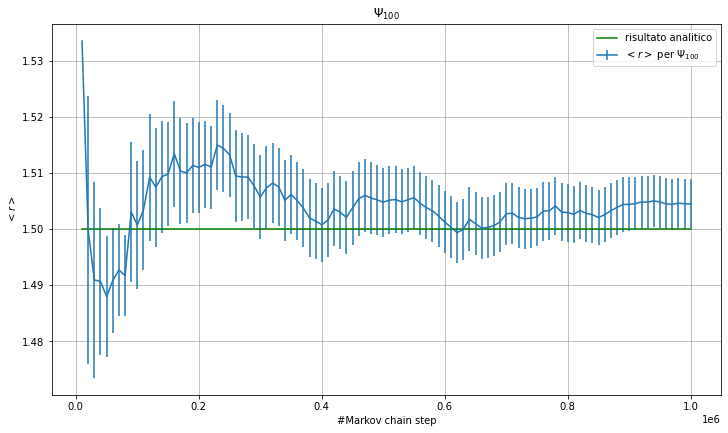

Risultato analitico 5.0
Valore finale della simulazione 5.00964
Acceptance rate 0.77


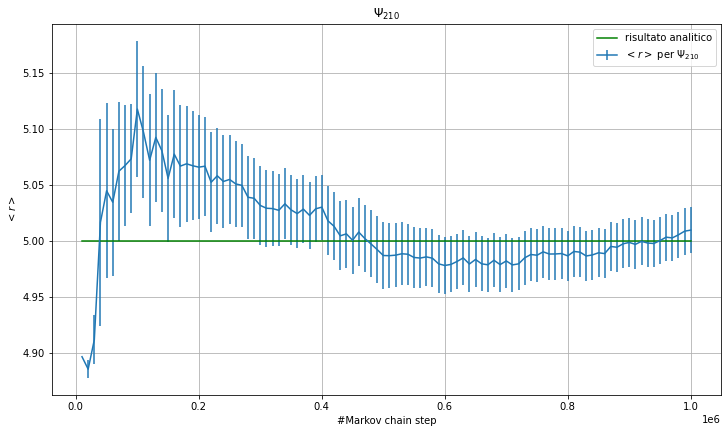

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

x,r100, e100= np.loadtxt('./data/av_rGSunif.dat', delimiter = ' ', unpack = 'True')
x,r210, e210= np.loadtxt('./data/av_r210unif.dat', delimiter = ' ', unpack = 'True')
y100 = 1.5*x**0
y210 = 5*x**0

plt.figure(figsize=(12, 15))
print("Risultato analitico: ", y100[0])
print("Valore finale della simulazione: ", r100[len(r100)-1])
print("Acceptance rate 0.50")
plt.subplot(211)
plt.plot(x,y100, color='green', label="risultato analitico") #grafico valore atteso
plt.errorbar(x, r100, yerr=e100, label='$<r>$ per $\Psi_{100}$') #grafico simulazione
plt.title("$\Psi_{100}$")
plt.xlabel('#Markov chain step')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 15))
print("Risultato analitico", y210[0])
print("Valore finale della simulazione", r210[len(r210)-1])
print("Acceptance rate 0.77")
plt.subplot(212)
plt.errorbar(x, r210, yerr=e210, label="$<r>$ per $\Psi_{210}$") #grafico simulazione
plt.plot(x,y210, color='green', label="risultato analitico") #grafico valore atteso
plt.title("$\Psi_{210}$")
plt.xlabel('#Markov chain step')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)

plt.show()

Il più alto rate di accettazione nel caso di stato eccitato non sembra affliggere in maniera irrevocabile il risultato, anche se pare che andando avanti il risultato possa ancora oscillare su una scala visibile nel grafico e un po' più ampia della barra di errore. Forse per via della grandezza dei blocchi ($10^4$ dati per blocco) le correlazione introdotte da un acceptance rate più alto vengono compensate.

Qui di seguito sono mostrate le distribuzioni nello spazio 3D dei punti accettati dall'algoritmo.

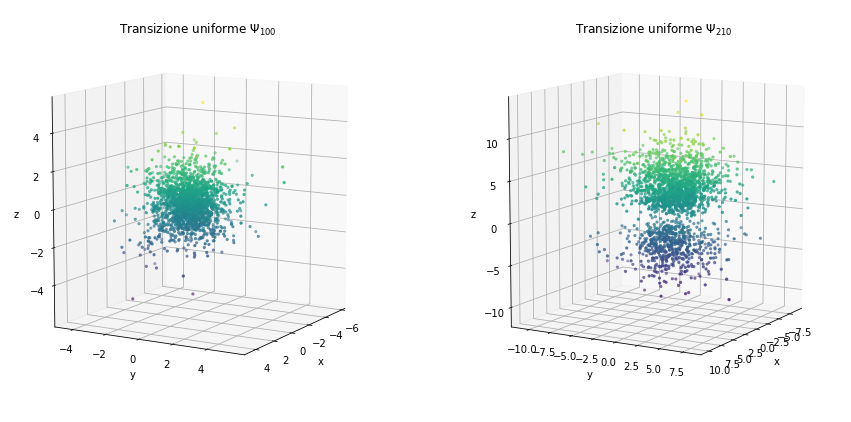

In [5]:
from mpl_toolkits.mplot3d import Axes3D

M = 2000 #numero di punti che effettivamente grafico
fig=plt.figure(figsize=(15,7.5))

#grafico uniforme n=1, l=0, m=0
X, Y, Z = np.loadtxt('./data/av_rGSunif.xyz', delimiter=' ', unpack=True, max_rows=M)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('Transizione uniforme $\Psi_{100}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

#grafico uniforme n=2, l=1, m=0
X, Y, Z = np.loadtxt('./data/av_r210unif.xyz', delimiter=' ', unpack=True, max_rows=M)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('Transizione uniforme $\Psi_{210}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

### <font color='blue'> Probabilità di transizione normale </font>
In coordinate cartesiane, la transizione a probabilità normale multivariata viene effettuata nel seguente modo:

- $x_{n+1} = \mathcal{N}(x_n, \Delta)$
- $y_{n+1} = \mathcal{N}(y_n, \Delta)$
- $z_{n+1} = \mathcal{N}(z_n, \Delta)$

$\mathcal{N}(x_n, \Delta)$ indica che sto generando il nuovo punto tramite una gaussiana con valor medio uguale al vecchio punto e deviazione standard uguale a $\Delta$. Tramite il processo di calibrazione trovo $\Delta \simeq 3/4$ come parametro ideale per l'autostato $\Psi_{100}$, mentre per l'autostato $\Psi_{210}$ trovo $\Delta \simeq 2$; i risultati di seguito per lo stato eccitato sono stati trovati utilizzando nuovamente $\Delta \simeq 6/5$ che scosta l'*acceptance rate* da $1/2$ per osservare se ci sono differenze tangibili nei risultati.

Abbiamo utilizzato di nuovo la probabilità di accettazione $A$ standard dell'algoritmo, $T(x|y)$ è di nuovo simmetrica.

Ancora una volta, in fase di calibrazione ho usato $10^4$ step nell'algoritmo, mentre per la simulaizone vera $10^6$ step; ho posto nuovamente il punto iniziale della catena nell'origine: ho il $68\%$ di probabilità di avere un incremento della singola coordinata più piccolo di $0.75 a_0$, ma con $10^6$ step dovrei riuscire a espplorare bene tutto lo spazio.

Ho utilizzato successivamente la tecnica del **data blocking** con $N=100$ blocchi per stimare media e errore della distribuzione di raggi ottenuta,osservo che in entrambi i casi l'algoritmo sembra convergere bene al valore atteso, sintomo che la pdf è stata ben campionata dallo stesso.

Risultato analitico:  1.5
Valore finale della simulazione:  1.49765
Acceptance rate 0.50


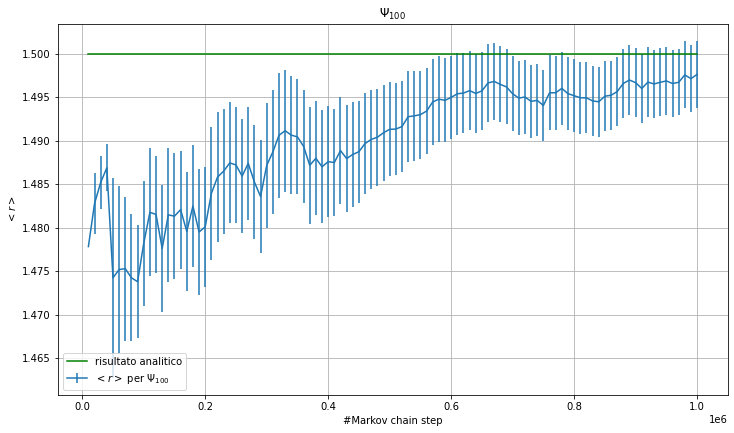

Risultato analitico 5.0
Valore finale della simulazione 5.02453
Acceptance rate 0.77


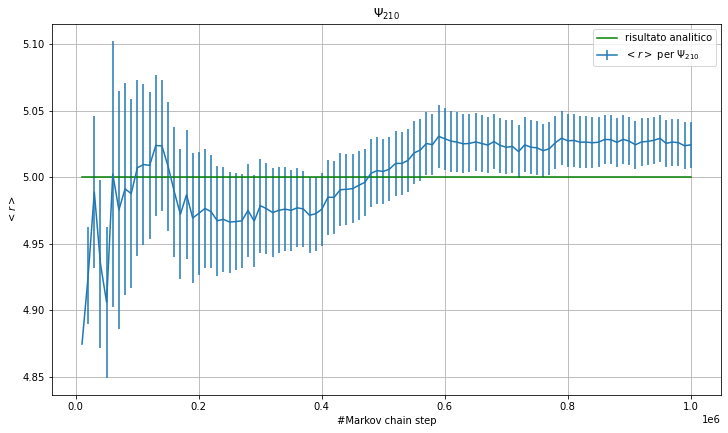

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

x,r100, e100= np.loadtxt('./data/av_rGSgauss.dat', delimiter = ' ', unpack = 'True')
x,r210, e210= np.loadtxt('./data/av_r210gauss.dat', delimiter = ' ', unpack = 'True')
y100 = 1.5*x**0
y210 = 5*x**0

plt.figure(figsize=(12, 15))
print("Risultato analitico: ", y100[0])
print("Valore finale della simulazione: ", r100[len(r100)-1])
print("Acceptance rate 0.50")
plt.subplot(211)
plt.plot(x,y100, color='green', label="risultato analitico") #grafico valore atteso
plt.errorbar(x, r100, yerr=e100, label='$<r>$ per $\Psi_{100}$') #grafico simulazione
plt.title("$\Psi_{100}$")
plt.xlabel('#Markov chain step')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 15))
print("Risultato analitico", y210[0])
print("Valore finale della simulazione", r210[len(r210)-1])
print("Acceptance rate 0.77")
plt.subplot(212)
plt.errorbar(x, r210, yerr=e210, label="$<r>$ per $\Psi_{210}$") #grafico simulazione
plt.plot(x,y210, color='green', label="risultato analitico") #grafico valore atteso
plt.title("$\Psi_{210}$")
plt.xlabel('#Markov chain step')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)

Di nuovo, il rate di accettazione nel caso di stato eccitato non sembra distruggere il calcolo, anche se il risultato finale è leggermente più distante di mezzo rms dal risultato esatto. Vale l'osservazione fatta in precedenza secondo cui i blocchi ($10^4$ dati per blocco) potrebbero risolvere il problema di un eventuale correlazione introdotta da un acceptance rate più alto.

Qui di seguito sono mostrate le distribuzioni nello spazio 3D dei punti accettati dall'algoritmo.

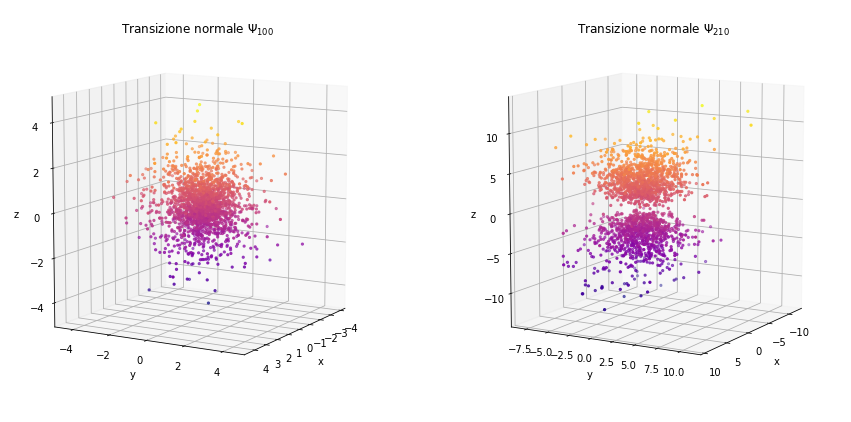

In [6]:
from mpl_toolkits.mplot3d import Axes3D

M = 2000
fig=plt.figure(figsize=(15,7.5))

#grafico uniforme n=1, l=0, m=0
X, Y, Z = np.loadtxt('./data/av_rGSgauss.xyz', delimiter=' ', unpack=True, max_rows=M)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.', cmap='plasma')
ax.set_title('Transizione normale $\Psi_{100}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

#grafico uniforme n=2, l=1, m=0
X, Y, Z = np.loadtxt('./data/av_r210gauss.xyz', delimiter=' ', unpack=True, max_rows=M)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.', cmap='plasma')
ax.set_title('Transizione normale $\Psi_{210}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

### <font color='blue'> Probabilità di transizione uniforme e partenza lontano dall'origine </font>
Ho lanciato una simulaizone anche per osservare il comportamento dell'algoritmo con partenza in zona con pdf piccola rispetto al massimo, nel caso di ground state con probabilità di transizione uniforme. Ho inizializzato:

- $x_0 = 20$
- $y_0 = 0$
- $z_0 = 0$

Risultato analitico:  1.5
Valore finale della simulazione:  1.50316
Acceptance rate 0.50


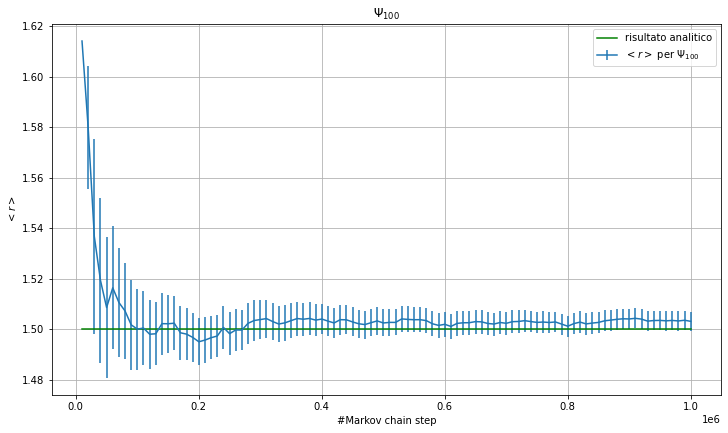

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

x,r100, e100= np.loadtxt('./data/av_rGSfarunif.dat', delimiter = ' ', unpack = 'True')
y100 = 1.5*x**0

plt.figure(figsize=(12, 15))
print("Risultato analitico: ", y100[0])
print("Valore finale della simulazione: ", r100[len(r100)-1])
print("Acceptance rate 0.50")
plt.subplot(211)
plt.plot(x,y100, color='green', label="risultato analitico") #grafico valore atteso
plt.errorbar(x, r100, yerr=e100, label='$<r>$ per $\Psi_{100}$') #grafico simulazione
plt.title("$\Psi_{100}$")
plt.xlabel('#Markov chain step')
plt.ylabel('$<r>$')
plt.legend()
plt.grid(True)
plt.show()

L'algoritmo ha valori iniziali molto più distanti dal valore atteso e si nota dal brusco salto iniziale non presente nelle altre simulazioni ($1.61$ come primo dato, contro $1.53$ nel caso svolto in precedenza). Questo andamento mostra come l'algoritmo dabbe fare un po' più di fatica per assestarsi intorno al valore atteso, tuttavia con un numero sufficiente di passi la convergenza rimane consistentemente al valore analitico anche per configurazione iniziale "lontana".

Qui di seguito sono mostrate le distribuzioni nello spazio 3D dei punti accettati dall'algoritmo.

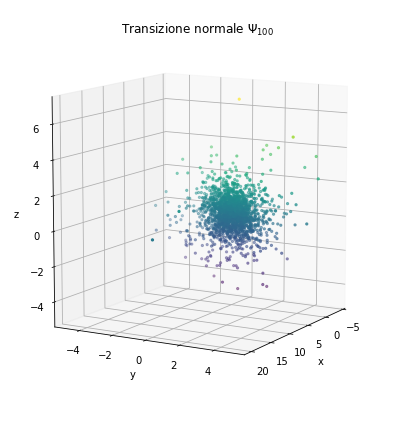

In [7]:
from mpl_toolkits.mplot3d import Axes3D

M = 2000
fig=plt.figure(figsize=(15,7.5))

X, Y, Z = np.loadtxt('./data/av_rGSfarunif.xyz', delimiter=' ', unpack=True, max_rows=M)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('Transizione normale $\Psi_{100}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)